In [1]:
from qtn.bimax import BiMax
from qtn.util import f1, j0
from qtn.bimax_util import z_b
import numpy as np
from sympy.mpmath import mp,fp
import matplotlib.pyplot as plt
%matplotlib inline

from qtn.new_bimax import new_BiMax

In [2]:
ant_len = 50      # m (monopole) 
ant_rad = 1.9e-4  # m
base_cap = 20e-12 # Farad
al_ratio = ant_rad / ant_len
print(al_ratio)

3.8e-06


In [3]:
q1 = BiMax(ant_len, ant_rad, base_cap)
q2 = new_BiMax(ant_len, ant_rad, base_cap)

In [28]:
wrel, l, n, t, tc = 0.8, 5, 0.2, 10, 1

In [29]:
mp.dps = 15
print(q2.new_bimax(wrel, l, n, t, tc))
mp.dps= 15

7.93158290270541e-17


In [30]:
mp.dps = 15
print(q1.bimax(wrel, l, n, t, tc))
mp.dps= 15

7.9315829027054e-17


In [31]:
# q2.new_bimax(wrel, l, n, t, tc)

In [32]:
wrel_arr = np.array([0.1, 0.5, 0.6, 0.8, 0.9, 0.95, 1.01, 1.03, 1.05, 1.08, 1.1, 1.2, 1.3, 1.5, \
                    1.7, 2.0, 2.3, 2.6, 3.0, 4, 6])

In [33]:
v2e_arr = np.array([q2.new_bimax(wrel, l, n, t, tc) for wrel in wrel_arr])

guess =  13.933504196
z0 =  14.3459223155171
dl_imag =  6.237026938062867e-08
guess =  8.32494622684
z0 =  9.24410446652185
dl_imag =  0.0027050595599930035
direct evaluating integral when peak is small
guess =  2.85104592181
z0 =  2.7223230621871
dl_imag =  0.19562385041532263
direct evaluating integral when peak is small
guess =  2.71155350342
z0 =  2.5068592930143
dl_imag =  0.20903141941928963
direct evaluating integral when peak is small
guess =  2.64510568235
z0 =  2.38406333649655
dl_imag =  0.23102034308929265
direct evaluating integral when peak is small
guess =  2.48041116762


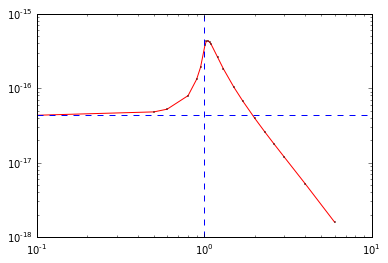

In [34]:
plt.plot(wrel_arr, v2e_arr, '-or', markersize = 1)
plt.axvline(1.0, linestyle = 'dashed')
plt.yscale('log')
plt.xscale('log')
plt.axhline(v2e_arr[0], linestyle = 'dashed')


In [ ]:
wrel, l, n, t, tc = 1.05, 5, 0.0, 1, 1
wc = wrel * np.sqrt(1 + n)

In [ ]:
mp.mp.dps = 15
guess = z_b(wc, n, t)
z0 = mp.fp.findroot(lambda z: BiMax.d_l(z, wc, n, t).real, guess)
print('d_l = ', BiMax.d_l(z0, wc, n, t))

z1 = z0* 0.999
z2 = z0*1.001
limits = [z1, z2]
limits_full = [z1, z0, z2]
int1 = mp.quad(lambda z: integrand(z, wc, l, n, t), [0, mp.inf])


print('int1 is ', int1)
print('int2 is ', int2)
print('int3 is ', int3)

mp.mp.dps = 15

In [ ]:
mp.mp.dps = 35
guess = z_b(wc, n, t)
z0 = mp.findroot(lambda z: BiMax.d_l(z, wc, n, t).real, guess)
print('d_l = ', BiMax.d_l(z0, wc, n, t))

z1 = z0* 0.999
z2 = z0*1.001
limits = [z1, z2]
limits_full = [z1, z0, z2]
int1 = mp.quad(lambda z: integrand(z, wc, l, n, t), limits_full)
int2 = integral_approx(z1, z2, z0, wc, l, n, t)
int3 = integral_approx_2(z1, z2, z0, wc, l, n, t)

print('int1 is ', int1)
print('int2 is ', int2)
print('int3 is ', int3)

mp.mp.dps = 15

In [ ]:
from qtn.bimax_util import j02

In [ ]:
xarr = np.linspace(0, 1, 50)
j02arr = np.array([j02(x) for x in xarr])

In [ ]:
plt.plot(xarr, j02arr)

In [ ]:
def this_fails():
    x = 1/0

try:
    this_fails()
except Exception as detail:
    print('Handling run-time error:', detail)